# Support Class 4 - Problem sheet 3

In [1]:
# Load some packages 
# (if you get an error, you need to install the package in the terminal)
import numpy as np                #scientific computing
from scipy.stats import multivariate_normal   #for probability distributions
from scipy.stats import norm                   #for probability distributions
import scipy.linalg               #for e'values/vectors
import matplotlib.pyplot as plt   #plotting
import seaborn as sns             #helps with data manipulation/plotting

#### Question 1

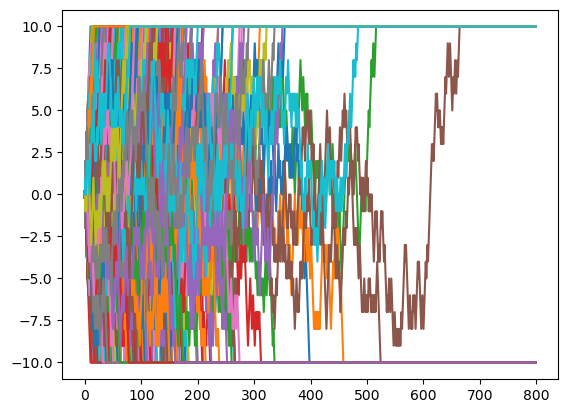

In [2]:
N = 10
num_realisations = 500
max_t = 800

# x0 = np.random.randint(2*N+1,size = num_realisations) - N
x0 = np.zeros(num_realisations)

X = np.zeros((max_t,num_realisations))
X[0,:] = x0

for t in range(max_t-1):
    dx = 2*np.random.randint(2, size = num_realisations) - 1
    x = X[t,:] + dx
    
    x[X[t,:]==N] = N
    x[X[t,:]==-N] = -N
    
    X[t+1,:] = x
    
plt.plot(X)
plt.ylim(-(N+1),N+1);

In [3]:
absorption_time = np.zeros(num_realisations)

for i in range(num_realisations):
    hit = np.nonzero(X[:,i]**2 == N**2)
    absorption_time[i] = np.min(hit)
    
print('Mean absorption time =',np.mean(absorption_time))
print('N^2 = ',N**2)

Mean absorption time = 95.168
N^2 =  100


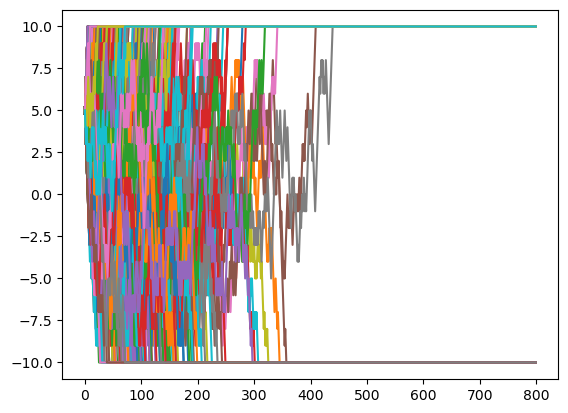

In [4]:
N = 10
num_realisations = 500
max_t = 800

# x0 = np.random.randint(2*N+1,size = num_realisations) - N
x0 = 5*np.ones(num_realisations)

X = np.zeros((max_t,num_realisations))
X[0,:] = x0

for t in range(max_t-1):
    dx = 2*np.random.randint(2, size = num_realisations) - 1
    x = X[t,:] + dx
    
    x[X[t,:]==N] = N
    x[X[t,:]==-N] = -N
    
    X[t+1,:] = x
    
plt.plot(X)
plt.ylim(-(N+1),N+1);

In [5]:
absorption_time = np.zeros(num_realisations)

for i in range(num_realisations):
    hit = np.nonzero(X[:,i]**2 == N**2)
    absorption_time[i] = np.min(hit)
    
print('Mean absorption time =',np.mean(absorption_time))
print('N^2 - k^2 = ',N**2 - 5**2)

Mean absorption time = 68.744
N^2 - k^2 =  75


#### Question 2

In [6]:
G = np.array([[-2,1,1],[1,-4,3],[0,1,-1]])
print(G)

[[-2  1  1]
 [ 1 -4  3]
 [ 0  1 -1]]


Suppose the state space of this chain is $S=\{1,2,3\}$. We will use the algorithm from the lectures to generate paths of this CTMC.

First calculate the transition probalities:

$$p^Y(x,y) = (1 - \delta_{x,y}) \frac{g(x,y)}{|g(x,x)|} .$$

In [7]:
diag_G = np.abs(np.diag(G))
P = np.eye(3,3) + G / diag_G[:,None]    # G / diag_G[:,None] divides row i by the (i,i) element
print(P)

[[0.   0.5  0.5 ]
 [0.25 0.   0.75]
 [0.   1.   0.  ]]


In [8]:
#This function for simulates a CTMC. It takes inputs:
# G: generator matrix (3 x 3)
# tmax: final run time (Starting at t = 0)
# IC: initial starting position the chain

def ThreeStateCTMC(G, tmax, IC):
    Y = np.array([IC])      #initialise the MC (state vector)
    J = np.array([0])       #initialise time at t = 0 (jump times vector)

    #calculate the transition matrix
    diag_G = np.abs(np.diag(G))
    P = np.eye(3,3) + G / diag_G[:,None]

    #simulate the chain up until end time
    t = 0
    while t < tmax:
        current_state = Y[-1]
        
        #randomly sample the holding time from the exponential distribution (given the current state)
        holding_time = np.random.exponential(np.abs(G[current_state-1,current_state-1]))        
        
        #add holding time to the current time
        t = t + holding_time
        
        #store jump times
        J = np.append(J,t)

        #randomly jump to another state using the transistion matrix
        Y = np.append(Y,np.random.choice([1,2,3],1,replace=True,p = P[current_state-1,:]))
        


    return J, Y

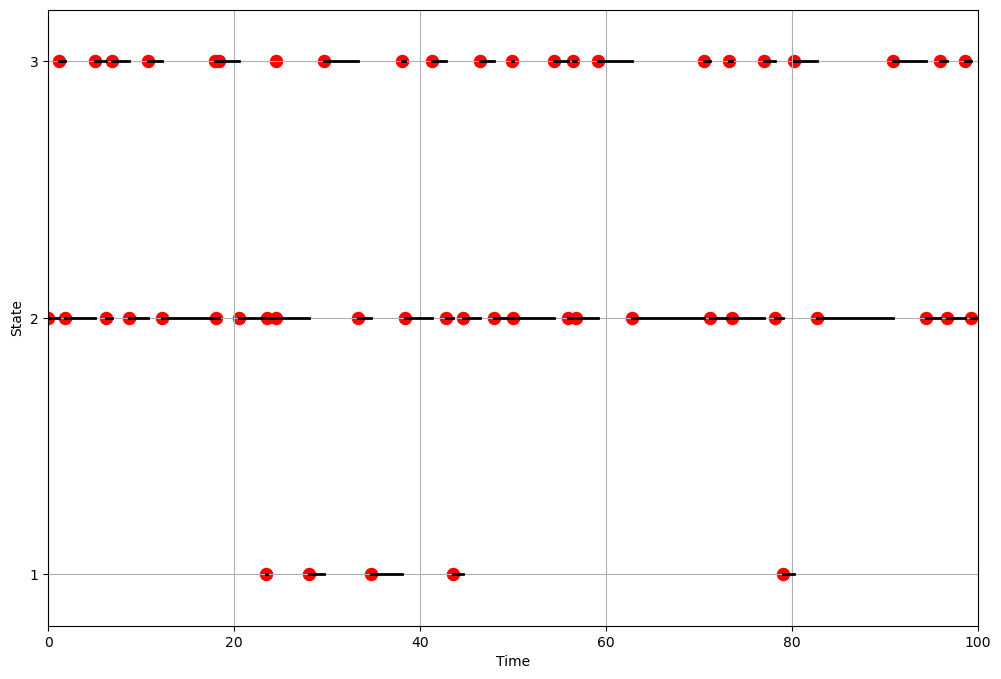

In [15]:
G = np.array([[-2,1,1],[1,-4,3],[0,1,-1]])
tmax = 100
IC = 2

#run function
J,Y = ThreeStateCTMC(G, tmax, IC)

#plot the jumps 

#matplotlib inline
plt.figure(figsize = (12,8))
plt.grid()
plt.xlabel('Time')
plt.ylabel('State')
plt.xlim([0,tmax])
plt.ylim([0.8,3.2])
plt.yticks([1,2,3])
for j in range(0,len(J)-1):
    plt.plot([J[j],J[j+1]], [Y[j],Y[j]],'k',lw=2)
plt.scatter(J, Y,s=75,color='r');